In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Ejercicio 2.18

Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{n \times n}$ como el máximo del valor $ \frac{\|Ax\|_2}{\|x\|_2} $ entre varios vectores $ x \in \mathbb{R}^3 $ no nulos generados al azar.

##### Instrucciones

Hacer un programa que reciba una matriz $A$ y luego:

   - Genere los primeros 100 términos de la siguiente sucesión:
      $$ s_1 = 0 , \ s_{k+1} = \max\{s_k, \frac{\|Ax_k\|_2}{\|x_k\|_2}\} $$
   
   donde los $ x_k \in \mathbb{R}^3 $ son vectores no nulos generados al azar en la bola unitaria: $B = \{x : \|x\|_2 \leq 1\} $.
   - Grafique la sucesión calculada, junto con el valor exacto de la norma 2 de la matriz.

###### Notas

- La norma 2 puede calcularse con el comando `np.linalg.norm`.
- Los vectores generados al azar con `np.random.random` tienen coordenadas en el intervalo [0,1].



In [16]:
## calcular |A| = max {||Ax||/||x||} con x no nulo. 

def estimacionNorma2(A: list[list[float]], n):
    # Defino el primer termino de la sucesion
    s = 0
    
    # Defino una lista de ceros para ir guardando las sucesiones
    x_sucesion = np.zeros(n)
    
    # Defino otra para ir guardando los errores de cada sucesion
    error_sucesion = np.zeros(n)

    # Itero hasta el termino deseado de la sucesion
    for k in range(n):
        # Defino un vector aleatorio en cada iteracion
        vector = np.random.random(3)
        
        # Calculo la norma-2 entre A y el vector aleatorio
        norma2_Ax = np.linalg.norm(A@vector,2)
        
        # Normalizo
        res = norma2_Ax / np.linalg.norm(vector, 2)
        
        # Elijo al maximo como el siguiente termino de la sucesion
        s = max(s, res)
        x_sucesion[k] += s
        
        # Calculo el error de esta iteracion
        error_sucesion[k] += (np.linalg.norm(A,2) - x_sucesion[k])/n
        
    print("Norma-2 calculada:   ", x_sucesion[n-1])
    print("Norma-2 exacta:      ", np.linalg.norm(A,2))
    print("Error relativo:      ", '%.5f'%((np.linalg.norm(A,2) - x_sucesion[n-1])/n,),"%")
    print("Error absoluto:      ", np.linalg.norm(A,2) - x_sucesion[n-1])

    x = np.arange(0,n)
    plt.title("Aproximación de norma-2 de A luego de 100 iteraciones")
    plt.xlabel("Iteracion")
    plt.plot(x, x_sucesion, label="Aproximación")
    
    # Plotea el valor exacto de la norma 2
    plt.plot(x, np.zeros(n) + np.linalg.norm(A,2), label="Valor exacto")    
    plt.legend(loc="lower right")          

Grafiquemos para ver mejor como converge a la norma 2 de A mientras mas itera:

Norma-2 calculada:    8.653382292438554
Norma-2 exacta:       8.666597613856615
Error relativo:       0.00013 %
Error absoluto:       0.01321532141806081


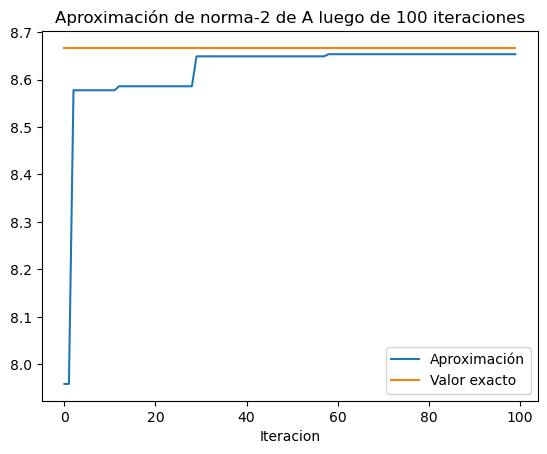

In [20]:
A = [[1,2,4],[4,5,1],[0,5,2]]
estimacionNorma2(A,100)

Bien! Aproxima y tiene un error muy chico; de la magnitud de 1e-4. veamos que pasa si iteramos 1000 veces:

Norma-2 calculada:    8.665831335246793
Norma-2 exacta:       8.666597613856615
Error relativo:       0.00000 %
Error absoluto:       0.0007662786098219243


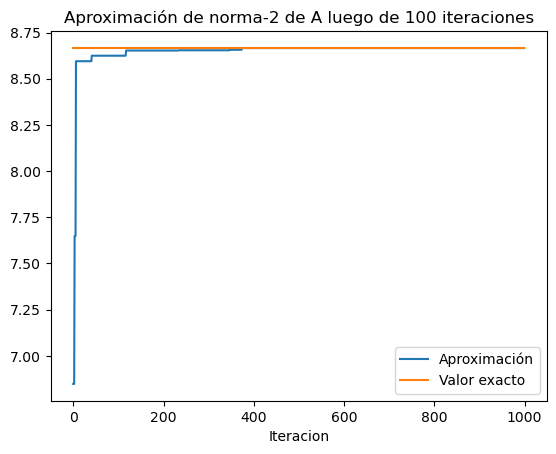

In [21]:
estimacionNorma2(A,1000)

El error se va a 0, o al menos es menor a 1e-5. Lo cual es lo mismo que ser igual numericamente. :sunglasses: